In [55]:
import numpy as np
import pandas as pd
import seaborn as sns

# The goal is to predict whether a user will purchase a product
# based on age and estimated salary.

In [56]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/Social_Network_Ads.csv"

# Read the CSV file
dataset = pd.read_csv(file_path)

# Display first few rows
print(dataset.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [57]:
dataset.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [58]:
X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [60]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
classifier.fit(X_train, y_train)

classifier


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
y_pred=classifier.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9125

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 2, 26]])

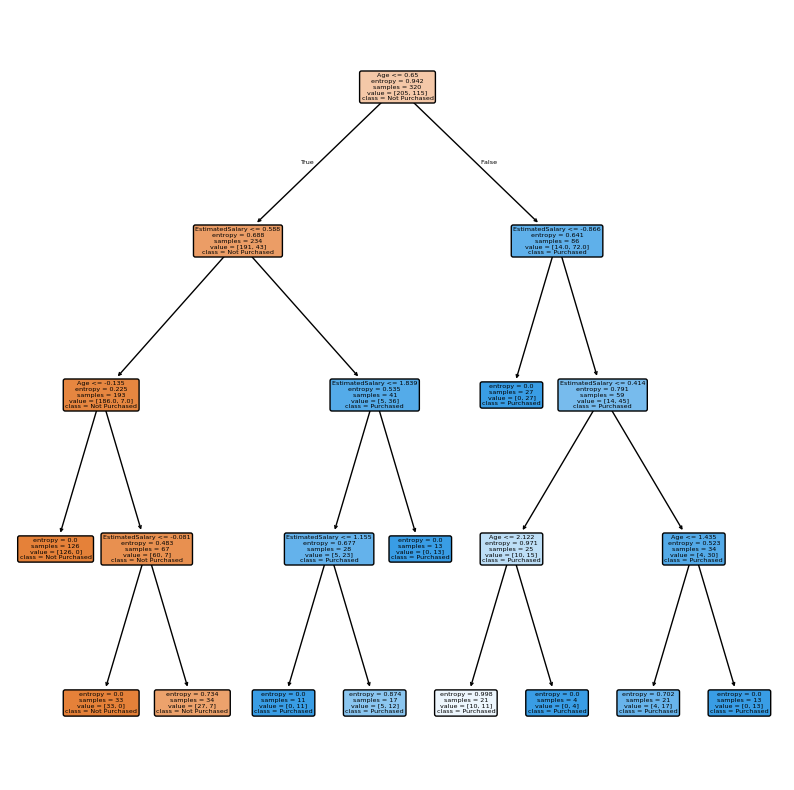

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plot_tree(
    classifier,
    feature_names=["Age", "EstimatedSalary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)

plt.show()


# TITANIC DATASET TO PREDICT THE SURVIVAL CHANCE

In [65]:
#1️⃣ Load & preprocess data (your part – correct)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = sns.load_dataset("titanic")

df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

df['age'] = df['age'].fillna(df['age'].median())
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

/tmp/ipython-input-2571534671.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [66]:
#2️⃣ Split data (VERY IMPORTANT)
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
#3️⃣ Train Decision Tree model
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [68]:
#4️⃣ Evaluate model (MANDATORY)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



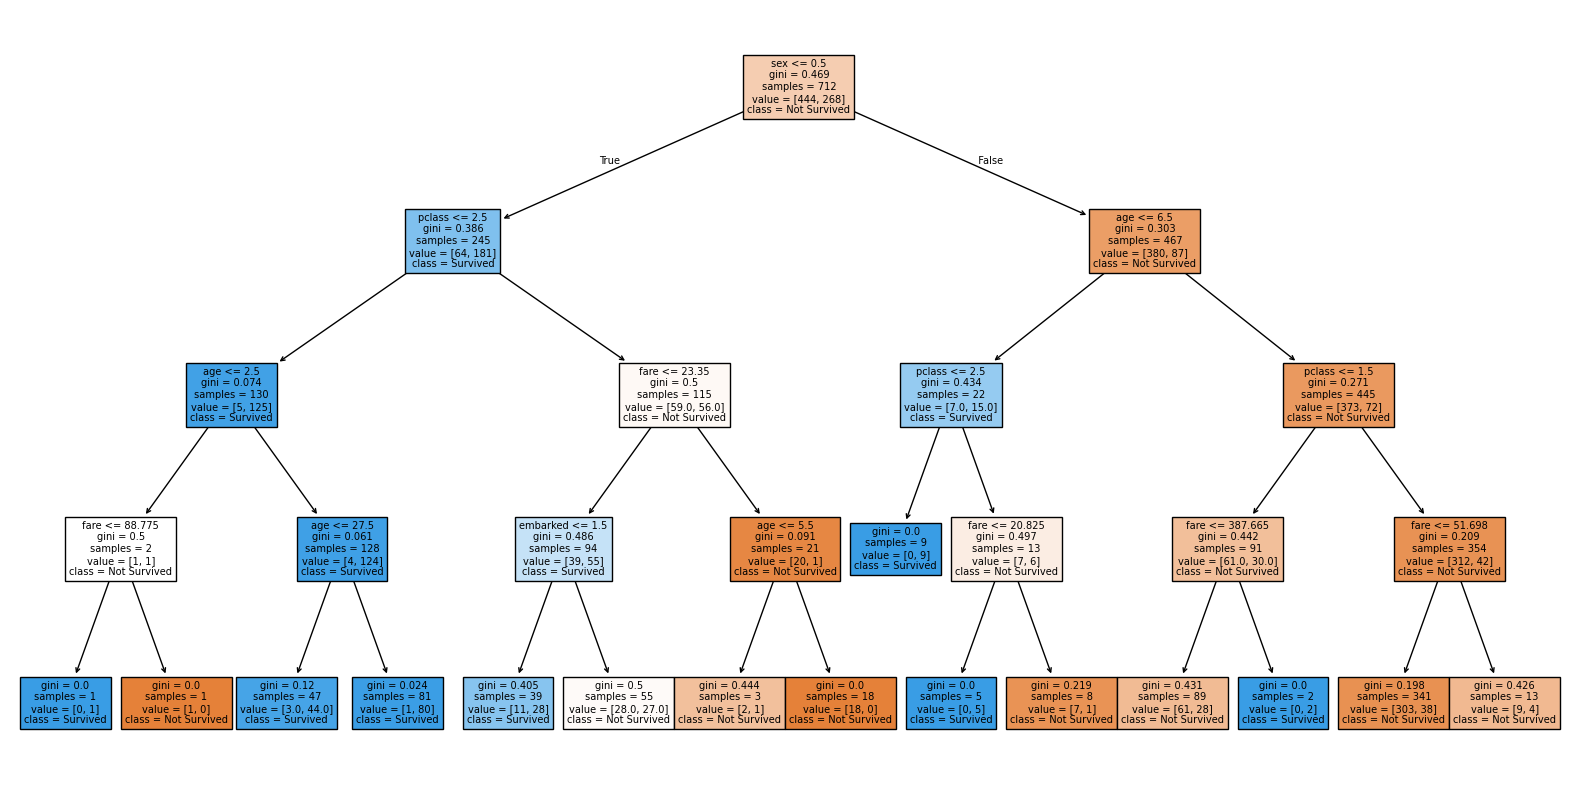

In [69]:
#5️⃣ Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True
)
plt.show()


In [70]:
#6️⃣ Predict for a new passenger
new_passenger = pd.DataFrame(
    [[3, 1, 25, 7.25, 2]],
    columns=X.columns
)

prediction = model.predict(new_passenger)

if prediction[0] == 1:
    print("Survived")
else:
    print("Not Survived")


Not Survived


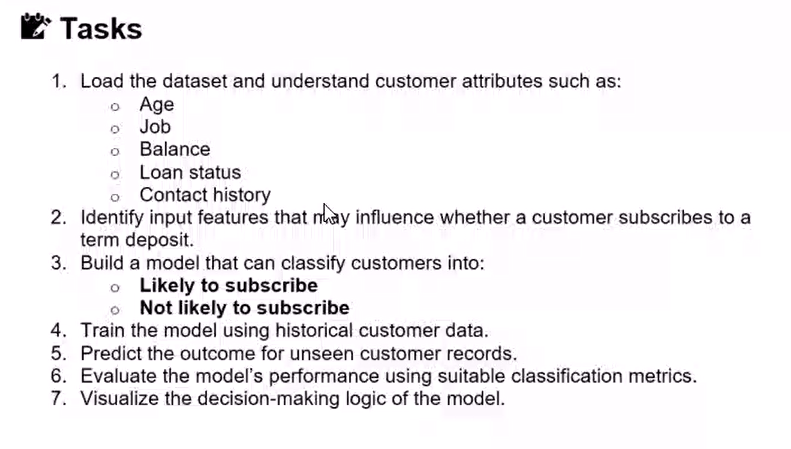

In [71]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/bank_marketing_dataset.csv"

# Read the CSV file
dff = pd.read_csv(file_path)

# Display first few rows
print(dataset.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
#Understand data (Task 1)
dff.head()

dff.info()

dff.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [74]:
#3: Data Preprocessing (CRITICAL for 0.8 accuracy)
for col in dff.select_dtypes(include="object").columns:
    dff[col] = dff[col].replace("unknown", dff[col].mode()[0])

In [75]:
#4: Outlier Removal (IQR – safe)
num_cols = dff.select_dtypes(include=["int64", "float64"]).columns

def remove_outliers_iqr(df, cols):
    df_new = df.copy()
    for col in cols:
        Q1 = df_new[col].quantile(0.25)
        Q3 = df_new[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[col] >= lower) & (df_new[col] <= upper)]
    return df_new

dff = remove_outliers_iqr(dff, num_cols)

In [76]:
#5: Feature selection


X = dff[
    ['age', 'job', 'balance', 'loan', 'contact',
     'duration', 'campaign', 'pdays', 'previous']
]

y = dff['deposit']

In [77]:
#6: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.select_dtypes(include="object").columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)  # yes=1, no=0


/tmp/ipython-input-940777664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-940777664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-940777664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [78]:
#7: Train–Test Split (Task 4)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [79]:
#8: Train Decision Tree (Entropy + Balanced)
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_split=20,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_split=20, random_state=42)

In [80]:
#9: Prediction (Task 5)
y_pred = model.predict(X_test)

In [81]:
#10: Evaluation (Task 6)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7846153846153846

Confusion Matrix:
 [[683 138]
 [142 337]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       821
           1       0.71      0.70      0.71       479

    accuracy                           0.78      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.78      0.78      0.78      1300



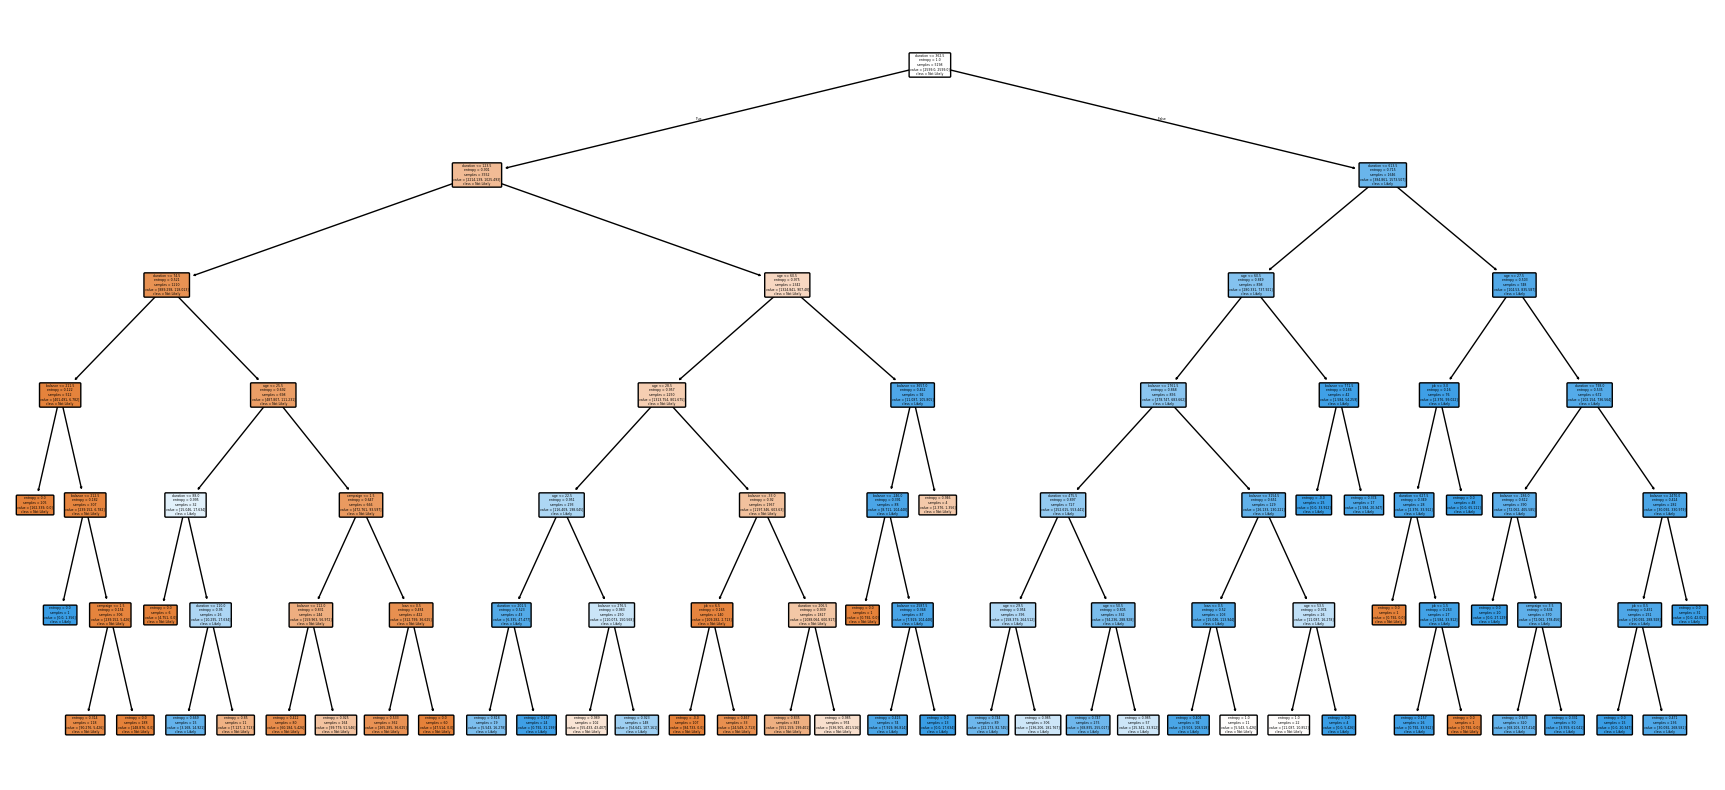

In [82]:
#11: Decision Tree Visualization (Task 7)
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Not Likely", "Likely"],
    filled=True,
    rounded=True
)
plt.show()

In [83]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
df.isna().sum()


,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [85]:
X = df.iloc[:, 2:4].values   # Age, EstimatedSalary
y = df.iloc[:, -1].values   # Purchased


In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [87]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [88]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

classifier.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [89]:
y_pred = classifier.predict(x_test)
y_pred


array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2])

In [90]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6480446927374302


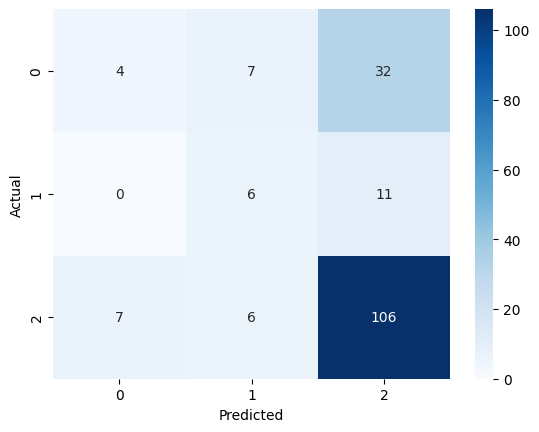

In [91]:
#Confusion Matrix (Heatmap)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

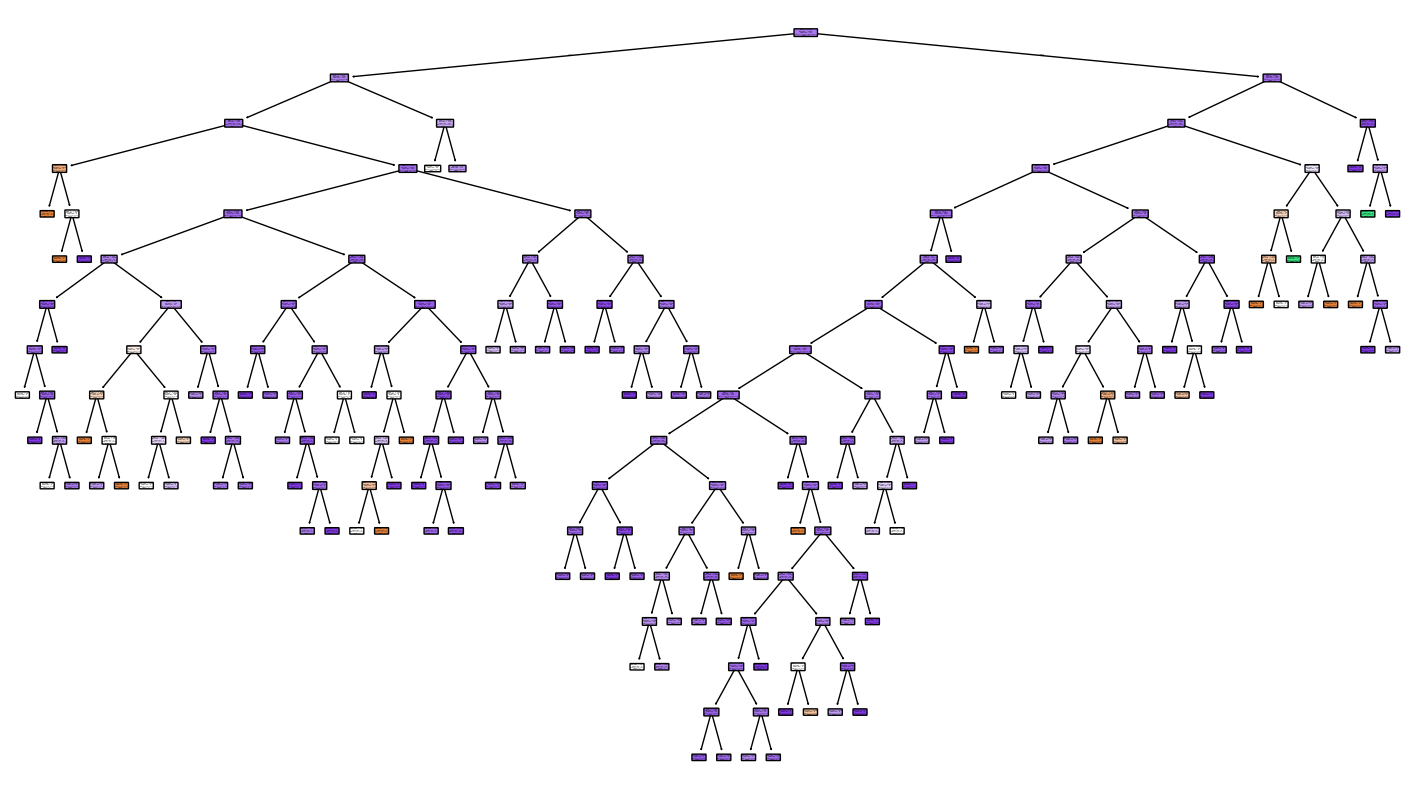

In [92]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["sex", "age"],
    class_names=["C", "Q", "S"],
    filled=True,
    rounded=True
)
plt.show()

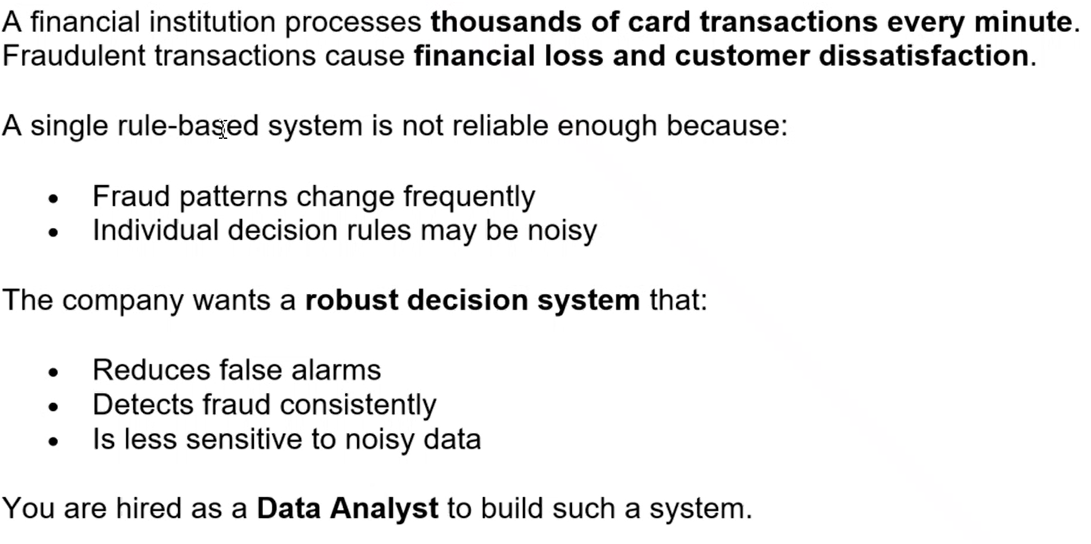

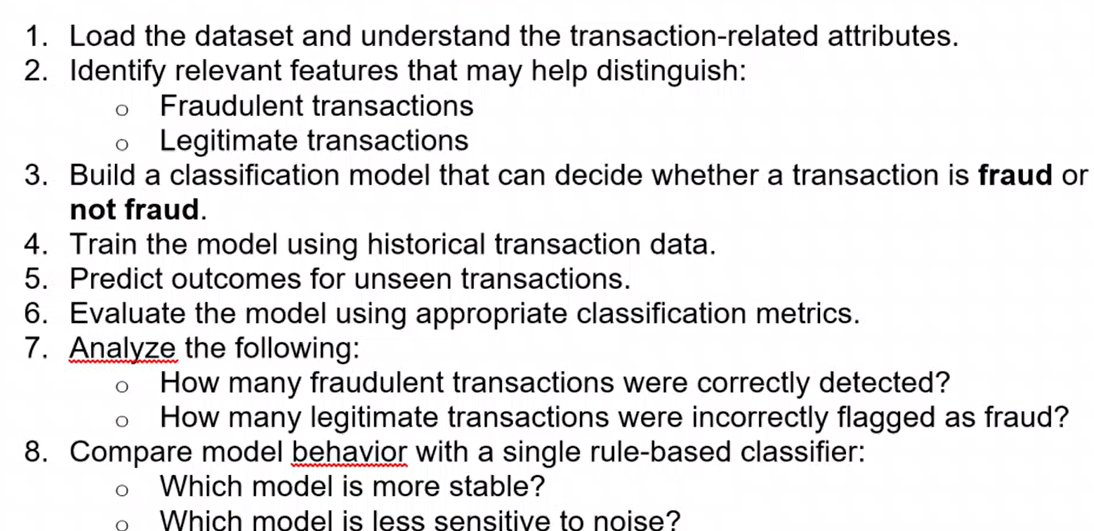

In [93]:
#1️ Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path inside Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/DataSets/creditcard.csv"

# Read the CSV file
df= pd.read_csv(file_path)

# Display first rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
#3️ Basic Data Understanding
# Shape
print("Dataset Shape:", df.shape)

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Class distribution
print("\nClass Distribution:\n", df['Class'].value_counts())

Dataset Shape: (284807, 31)

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [96]:
#4️ Feature & Target Split
X = df.drop("Class", axis=1)
y = df["Class"]

In [97]:
#5️ Train–Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [98]:
#6️ Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
#7️ Build & Train Robust Model (Logistic Regression)
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [100]:
#8️ Predictions
y_pred = model.predict(X_test)

Confusion Matrix:
 [[55478  1386]
 [    8    90]]


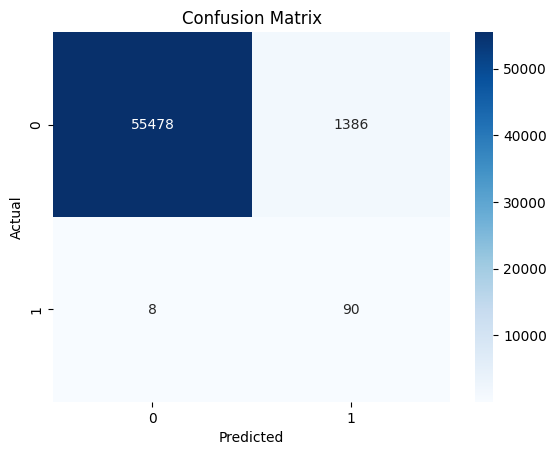

In [101]:
#9️ Model Evaluation (CORE PART)
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [102]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [103]:
#Individual Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Accuracy : 0.9755275446789088
Precision: 0.06097560975609756
Recall   : 0.9183673469387755
F1 Score : 0.11435832274459974


In [104]:
# Analysis (Answers to Question 7)
TN, FP, FN, TP = cm.ravel()

print("Correctly detected frauds (TP):", TP)
print("Missed frauds (FN):", FN)
print("Legitimate transactions flagged as fraud (FP):", FP)
print("Correctly allowed legitimate transactions (TN):", TN)

Correctly detected frauds (TP): 90
Missed frauds (FN): 8
Legitimate transactions flagged as fraud (FP): 1386
Correctly allowed legitimate transactions (TN): 55478


In [105]:
#1️1️ Rule-Based Classifier (For Comparison)
#Simple Rule:

#If Amount > 2000 → Fraud

rule_pred = (df['Amount'] > 2000).astype(int)

print("\nRule-Based Classification Report:\n")
print(classification_report(y, rule_pred))


Rule-Based Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [106]:
#1️2️ ML vs Rule-Based Comparison
print("ML Model Recall :", recall_score(y_test, y_pred))
print("Rule-Based Recall :", recall_score(y, rule_pred))

ML Model Recall : 0.9183673469387755
Rule-Based Recall : 0.0020325203252032522


In [107]:
#1️3️ Business Interpretation (Final)
print("""
Business Insight:
- False Negatives (missed frauds) are more costly
- Model prioritizes Recall to catch maximum frauds
- Acceptable trade-off: Slight customer inconvenience
""")


Business Insight:
- False Negatives (missed frauds) are more costly
- Model prioritizes Recall to catch maximum frauds
- Acceptable trade-off: Slight customer inconvenience

